## Lab 2
### Student Name

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
df_penguins = sns.load_dataset('penguins')

## Q0

Recreate the set-up which we did in class.

In [6]:
df_penguins['is_male'] = df_penguins['sex'].apply(lambda x : int(x == 'Male'))
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0


In [9]:
# noticed we have some missing values for our variables here
# let's drop those rows
df_penguins = df_penguins.dropna( how='any', subset=['flipper_length_mm', 'body_mass_g', 'sex'])
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


In [10]:
model = ols(formula = 'body_mass_g ~ flipper_length_mm + is_male', data=df_penguins)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          3.53e-118
Time:                        17:23:16   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
is_male             347.8503     40.342      8.623      0.000     268.491     427.209
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q1

Create a scatter plot with flipper length on the x-axis and body mass on the y-axis. Color the points according to the penguin's sex.

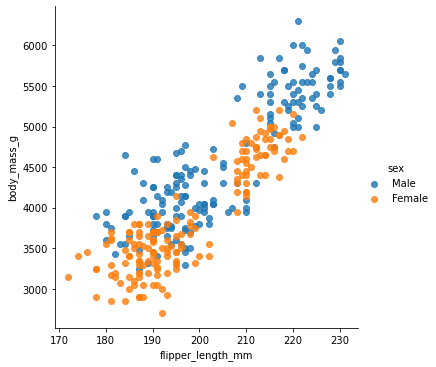

In [11]:
sns.lmplot( x="flipper_length_mm", y="body_mass_g", data=df_penguins, fit_reg=False, hue='sex')
plt.show()

## Q2

Find the line of best fit for the penguins dataset to predict body mass from flipper length. Plot this on the plot from Q1.

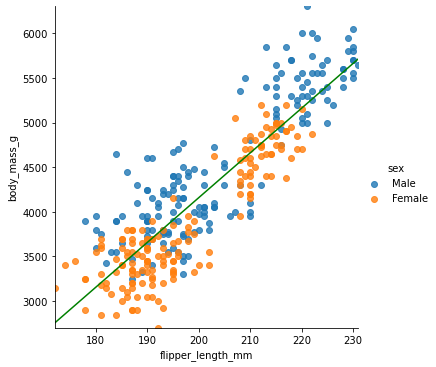

In [12]:
# fit the model
model = ols(formula = 'body_mass_g ~ flipper_length_mm', data=df_penguins)
res = model.fit()
b, m = res.params

# make the plot
sns.lmplot( x="flipper_length_mm", y="body_mass_g", data=df_penguins, fit_reg=False, hue='sex')

plt.axline((0, b), slope=m, color='green')

plt.xlim(min(df_penguins["flipper_length_mm"]), max(df_penguins["flipper_length_mm"]))
plt.ylim(min(df_penguins["body_mass_g"]), max(df_penguins["body_mass_g"]))
plt.show()

## Q3

Find two lines of best fit: one for the male and one for the female penguins. Plot this on the plot from Q1.

In [14]:
df_male = df_penguins[df_penguins['is_male'] == 1]
df_female = df_penguins[df_penguins['is_male'] == 0]

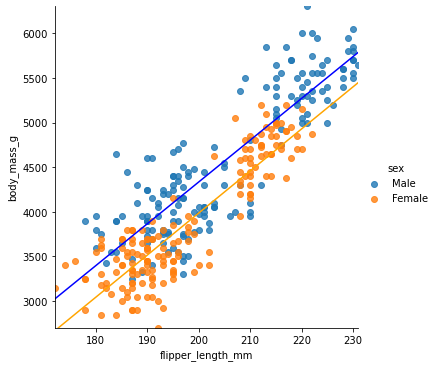

In [15]:
# make the plot
sns.lmplot( x="flipper_length_mm", y="body_mass_g", data=df_penguins, fit_reg=False, hue='sex')

# fit male line
model = ols(formula = 'body_mass_g ~ flipper_length_mm', data=df_male)
res = model.fit()
b, m = res.params
plt.axline((0, b), slope=m, color='blue')


# fit female line
model = ols(formula = 'body_mass_g ~ flipper_length_mm', data=df_female)
res = model.fit()
b, m = res.params
plt.axline((0, b), slope=m, color='orange')

plt.xlim(min(df_penguins["flipper_length_mm"]), max(df_penguins["flipper_length_mm"]))
plt.ylim(min(df_penguins["body_mass_g"]), max(df_penguins["body_mass_g"]))
plt.show()

## Q4
Take the line of best fit from above which used both flipper length and ```is_male```. Plot this line with $X_{is\_male}=0$ and with $X_{is\_male}=1$. What do you notice?

In [25]:
model = ols(formula = 'body_mass_g ~ flipper_length_mm + is_male', data=df_penguins)
res = model.fit()
res.params

Intercept           -5410.300224
flipper_length_mm      46.982175
is_male               347.850254
dtype: float64

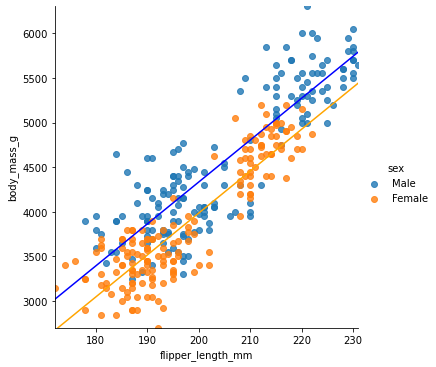

In [29]:
# make the plot
sns.lmplot( x="flipper_length_mm", y="body_mass_g", data=df_penguins, fit_reg=False, hue='sex')

# is_male=1
b, m1, m2 = res.params
b = b + m2
plt.axline((0, b), slope=m1, color='blue')

# is_male=0
b, m1, m2 = res.params
plt.axline((0, b), slope=m1, color='orange')

plt.xlim(min(df_penguins["flipper_length_mm"]), max(df_penguins["flipper_length_mm"]))
plt.ylim(min(df_penguins["body_mass_g"]), max(df_penguins["body_mass_g"]))
plt.show()